In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
period = 0.55  # days
timespan = 3*365  # days
average_cadence = 1  # observations per day

n_obs = int(timespan * average_cadence)
times = np.random.rand(n_obs) * timespan
times = np.sort(times)
magnitudes = np.sin(2*np.pi*(1/period)*times) + 0.2* np.random.randn(n_obs)

In [41]:
smallest_frequency = 1.0/1_000
largest_frequency = 1.0/0.05
f_range = largest_frequency - smallest_frequency
shift = 0.1
grid_size = int(np.ceil(f_range * timespan / (2.0 * shift)))
print(grid_size)

109495


In [42]:
dfreq = (largest_frequency - smallest_frequency) / (grid_size - 1)
almost_period = 1/(1/period + dfreq)
almost_period, period

(0.549944754143369, 0.55)

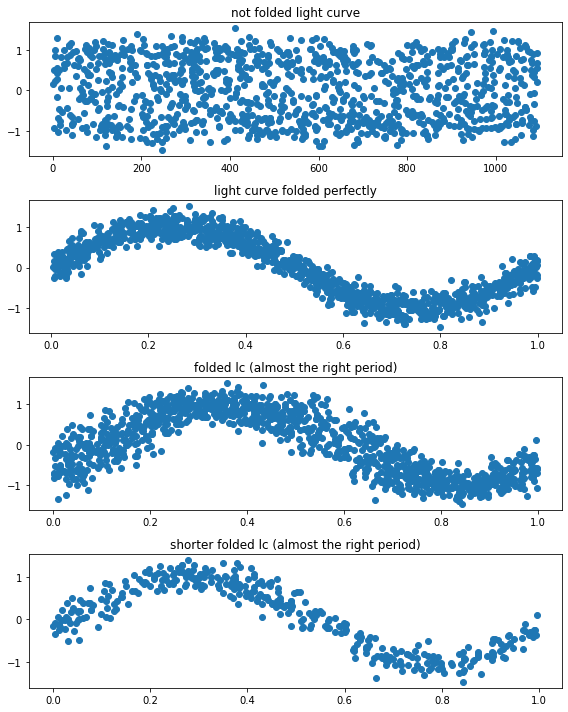

In [43]:
plt.figure(figsize=(8, 10))

plt.subplot(4, 1, 1)
plt.scatter(times, magnitudes)
plt.title('not folded light curve')

plt.subplot(4, 1, 2)
plt.scatter(
    (times % period)/period,
    magnitudes
)
plt.title('light curve folded perfectly')

plt.subplot(4, 1, 3)
plt.scatter(
    (times % almost_period)/almost_period,
    magnitudes
)
plt.title('folded lc (almost the right period)')

plt.subplot(4, 1, 4)
plt.scatter(
    (times[:(n_obs // 3)] % almost_period)/almost_period,
    magnitudes[:(n_obs // 3)]
)
plt.title('shorter folded lc (almost the right period)')
plt.tight_layout();